In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tqdm import tqdm

In [12]:
dx = 0.002 # 空間差分間隔[m]
c = 299792458.0 # 光速[m/s]

dt = dx/c * 0.99 # 時間差分間隔[s]
f = 3.5e9 # 周波数[Hz]

nx = 10000 # 計算点数
nt = 500 # 計算ステップ数

## 真空

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 726.75it/s]


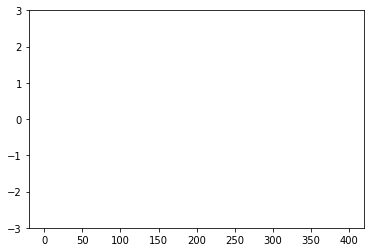

In [13]:
# 初期化
t = 0.0

eps = np.full(nx, 8.854187817e-12)
mu = np.full(nx, 1.2566370614e-6)

E_y = np.zeros(nx)
E_z = np.zeros(nx)
H_y = np.zeros(nx)
H_z = np.zeros(nx)

fig = plt.figure()
image_list = []
for _ in tqdm(range(nt)):
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    E_y += -dt/(eps*dx) * (H_z - np.roll(H_z, shift=1))
    E_z += dt/(eps*dx) * (H_y - np.roll(H_y, shift=1))
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    H_y += -dt/(mu*dx) * (E_z - np.roll(E_z, shift=-1))
    H_z += dt/(mu*dx) * (E_y - np.roll(E_y, shift=-1))
    
    img = plt.plot(E_y[nx//2 - 200 : nx//2 + 200], color="blue")
    plt.ylim(-3.0, 3.0)
    image_list.append(img)

ani = animation.ArtistAnimation(fig, image_list, interval=50)
ani.save("freeSpace.gif", writer="pillow")

## 誘電体

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 670.23it/s]


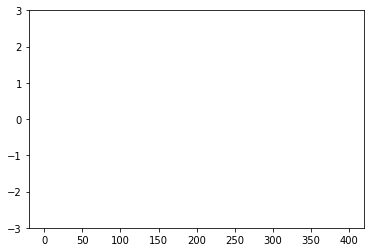

In [14]:
# 初期化
t = 0.0

E_y = np.zeros(nx)
E_z = np.zeros(nx)
H_y = np.zeros(nx)
H_z = np.zeros(nx)

fig = plt.figure()
image_list = []

eps = np.full(nx, 8.854187817e-12)
mu = np.full(nx, 1.2566370614e-6)

eps[nx//2 + 50] = 100 * 8.854187817e-12 # 比誘電率100の誘電体を設置

for _ in tqdm(range(nt)):
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    E_y += -dt/(eps*dx) * (H_z - np.roll(H_z, shift=1))
    E_z += dt/(eps*dx) * (H_y - np.roll(H_y, shift=1))
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    H_y += -dt/(mu*dx) * (E_z - np.roll(E_z, shift=-1))
    H_z += dt/(mu*dx) * (E_y - np.roll(E_y, shift=-1))
    
    img = plt.plot(E_y[nx//2 - 200 : nx//2 + 200], color="blue")
    plt.ylim(-3.0, 3.0)
    image_list.append(img)

ani = animation.ArtistAnimation(fig, image_list, interval=50)
ani.save("Permitibity.gif", writer="pillow")

## 金属

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 619.56it/s]


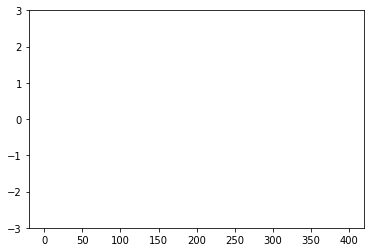

In [15]:
# 初期化
t = 0.0

E_y = np.zeros(nx)
E_z = np.zeros(nx)
H_y = np.zeros(nx)
H_z = np.zeros(nx)

fig = plt.figure()
image_list = []

eps = np.full(nx, 8.854187817e-12)
mu = np.full(nx, 1.2566370614e-6)

for _ in tqdm(range(nt)):
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    E_y += -dt/(eps*dx) * (H_z - np.roll(H_z, shift=1))
    E_z += dt/(eps*dx) * (H_y - np.roll(H_y, shift=1))
    
    E_y[nx//2 + 50] = 0.0
    E_z[nx//2 + 50] = 0.0
    
    # 電界のy成分を励振
    E_y[nx//2] = np.sin(2.0 * np.pi * f * t)
    
    t += dt/2
    H_y += -dt/(mu*dx) * (E_z - np.roll(E_z, shift=-1))
    H_z += dt/(mu*dx) * (E_y - np.roll(E_y, shift=-1))
    
    img = plt.plot(E_y[nx//2 - 200 : nx//2 + 200], color="blue")
    plt.ylim(-3.0, 3.0)
    image_list.append(img)

ani = animation.ArtistAnimation(fig, image_list, interval=50)
ani.save("Metal.gif", writer="pillow")